In [102]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [103]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2023-09-18 14:12:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.5’

housing.csv.5       100%[===================>]   1,36M  6,74MB/s    in 0,2s    

2023-09-18 14:12:24 (6,74 MB/s) - ‘housing.csv.5’ saved [1423529/1423529]



In [104]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [105]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

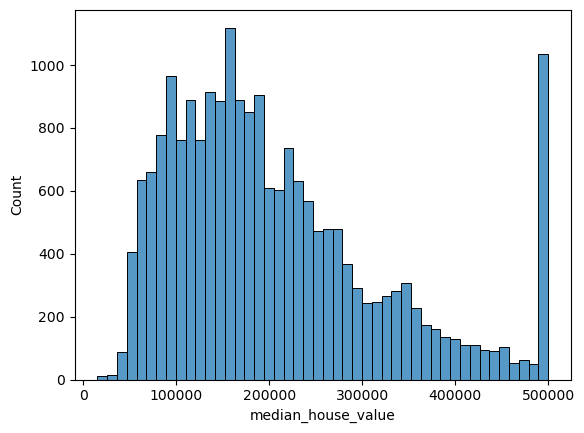

In [106]:
sns.histplot(df['median_house_value'])

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [107]:
ocean_proximity_filter = (df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
df_prep = df.loc[ocean_proximity_filter, columns]
df_prep

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms` *
* `population`
* `households`

In [108]:
df_prep.isna().sum() # total_bedrooms 157

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195 *
- 1295

In [109]:
population_median = df_prep['population'].median() # 1195
population_median

1195.0

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [110]:
n = len(df_prep)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_prep.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good *

In [111]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) # returns new matrix with 1s in the 1st column
    
    # w = ((XT*X)^-1)*XT*y
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

RMSE (missing values are 0): 0.34


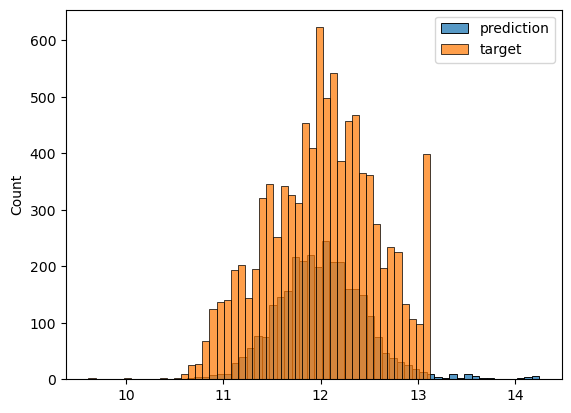

In [112]:
# fill missing values with 0
df_train_0 = df_train.fillna(0)

X_train_0 = df_train_0.values
w_0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = df_val.fillna(0).values
y_pred_0 = w_0 + X_val_0.dot(w)

rmse_0 = rmse(y_val, y_pred_0)
print('RMSE (missing values are 0):', round(rmse_0, 2))

sns.histplot(y_pred_0, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

RMSE (missing values are mean of total_bedrooms): 0.34


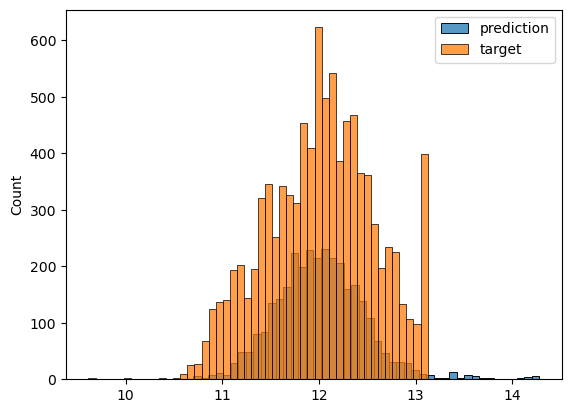

In [113]:
# fill missing values with the mean
mean_total_bedrooms = df_train['total_bedrooms'].mean()
df_train_mean = df_train.fillna(mean_total_bedrooms)

X_train_mean = df_train_mean.values
w_0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = df_val.fillna(mean_total_bedrooms).values
y_pred_mean = w_0 + X_val_mean.dot(w)

rmse_mean = rmse(y_val, y_pred_mean)
print('RMSE (missing values are mean of total_bedrooms):', round(rmse_mean, 2))

sns.histplot(y_pred_mean, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0 *
- 0.000001
- 0.001
- 0.0001

In [114]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [118]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

X_train = df_train.fillna(0).values

outputs = []

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    outputs.append((w_0, w))

X_val = df_val.fillna(0).values

val_rmses = []

for w_0, w in outputs:
    y_pred = w_0 + X_val.dot(w)
    r = rmse(y_val, y_pred)
    val_rmses.append(round(r, 2))
    
dict(zip(r_values, val_rmses))

{0: 0.34,
 1e-06: 0.34,
 0.0001: 0.34,
 0.001: 0.34,
 0.01: 0.34,
 0.1: 0.34,
 1: 0.34,
 5: 0.35,
 10: 0.35}

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005 *
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [120]:
def generate_shuffled_df(df, seed):
    n = len(df)
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    return df.iloc[idx]

def split_df(df, n_train, n_val, n_test):
    df_train = df.iloc[:n_train].copy()
    df_val = df.iloc[n_train:n_train+n_val].copy()
    df_test = df.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

def get_y(df, column):
    y = np.log1p(df[column].values)
    del df[column]
    return y

In [128]:
n = len(df_prep)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

target_column = 'median_house_value'

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_values = []

for s in seeds:
    df_shuffled = generate_shuffled_df(df_prep, s)
    df_train, df_val, df_test = split_df(df_shuffled, n_train, n_val, n_test)

    y_train = get_y(df_train, target_column)
    y_val = get_y(df_val, target_column)
    y_test = get_y(df_test, target_column)

    X_train = df_train.fillna(0).values
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w_0 + X_val.dot(w)

    rmse_values.append(rmse(y_val, y_pred))

std = np.std(rmse_values)
round(std, 3)

0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [130]:
df_shuffled = generate_shuffled_df(df_prep, 9)
df_train, df_val, df_test = split_df(df_shuffled, n_train, n_val, n_test)

y_train = get_y(df_train, target_column)
y_val = get_y(df_val, target_column)
y_test = get_y(df_test, target_column)

X_train = df_train.fillna(0).values
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = df_val.fillna(0).values
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3341530188124614

## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used